# NAML project - Stroke prediction
Cavallini - Eusebio

In [709]:
# !pip install numpy
# !pip install matplotlib
# !pip install pandas
# !pip install seaborn
# !pip install scikit-learn
# !pip install imblearn

In [710]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

We start by loading the dataset and visualizing the data 

In [711]:
dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [712]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


There are clearly some NaN values in the dataset, we will have to deal with them.
Since in the paper it was mentioned that that there were no missing values, we will drop such rows.

We will start by visualizing the data to get a better understanding of the dataset. <br>
In particular, we will look at the distribution of the features and the target variable.

In [713]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Data preprocessing - Filtering

In [714]:
dataset.drop('id', axis=1, inplace=True)
dataset.dropna(inplace=True)

# remove age less than 18
dataset = dataset[dataset['age'] >= 18]

# remove unknown smoking status
dataset = dataset[dataset['smoking_status'] != 'Unknown']

# remove Other gender
dataset = dataset[dataset['gender'] != 'Other']

# remove outliers in bmi
dataset = dataset[dataset['bmi'] < 90]

dataset.drop_duplicates(inplace=True)


The BMI plot presents a clear outlier for a BMI of 92.0. We will remove this outlier from the dataset.

From this plot is difficult to see the real correlation between the features and the target variable. <br>
This is due to the fact that the dataset is unbalanced.

Age (years): This feature refers to the age of the participants who are over 18 years old.

Gender: This feature refers to the participant’s gender. The number of men is
1260, whereas the number of women is 1994.

Hypertension: This feature refers to whether this participant is hypertensive or
not. The percentage of participants who have hypertension is 12.54%.

Heart_disease: This feature refers to whether this participant suffers from heart
disease or not. The percentage of participants suffering from heart disease is 6.33%.

Ever married: This feature represents the marital status of the participants, 79.84%
of whom are married.

Work type: This feature represents the participant’s work status and has 4 categories
(private 65.02%, self-employed 19.21%, govt_job 15.67% and never_worked 0.1%).

Residence type: This feature represents the participant’s living status and has
2 categories (urban 51.14%, rural 48.86%).

Avg glucose level (mg/dL): This feature captures the participant’s average glucose level.

BMI (Kg/m2): This feature captures the body mass index of the participants.

Smoking Status: This feature captures the participant’s smoking status and has
3 categories (smoke 22.37%, never smoked 52.64% and formerly smoked 24.99%).

Stroke: This feature represents if the participant previously had a stroke or not.
The percentage of participants who have suffered a stroke is 5.53%

We can see that the minimum age in the cleaned dataset is 18, as required in the paper. <br>

### Dataset analysis

In [715]:
# counting stroke
stroke_count =dataset['stroke'].value_counts()
# print(stroke_count)
print("Stroke fraction ", stroke_count[1]/(stroke_count[0]+stroke_count[1]))

# counting gender
gender_count = dataset['gender'].value_counts()
males_who_had_stroke = dataset[(dataset['gender'] == 'Male') & (dataset['stroke'] == 1)]
females_who_had_stroke = dataset[(dataset['gender'] == 'Female') & (dataset['stroke'] == 1)]
print('Males: ', gender_count['Male'])
print('Females: ', gender_count['Female'])

print("Percent of males in stroke: ", males_who_had_stroke.shape[0]/stroke_count[1])
print("Percent of females in stroke: ", females_who_had_stroke.shape[0]/stroke_count[1])

print("Incidence of stroke in males: ", males_who_had_stroke.shape[0]/gender_count['Male'])
print("Incidence of stroke in females: ", females_who_had_stroke.shape[0]/gender_count['Female'])

# counting hypertension
hypertension_count =dataset['hypertension'].value_counts()
# print(hypertension_count)
print("Hypertension fraction: ", hypertension_count[1]/(hypertension_count[0]+hypertension_count[1]))

# counting heart disease
heart_disease_count =dataset['heart_disease'].value_counts()
# print(heart_disease_count)
print("Hearth disease fraction: " ,heart_disease_count[1]/(heart_disease_count[0]+heart_disease_count[1]))

# counting ever married
ever_married_count =dataset['ever_married'].value_counts()
# print(ever_married_count)
print("Married fraction ", ever_married_count[0]/(ever_married_count[0]+ever_married_count[1]))

# counting work type
work_type_count =dataset['work_type'].value_counts()
# print(work_type_count)
print("Private fraction ", work_type_count[0]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))
print("Self Employed fraction ",work_type_count[1]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))
print("Gov fraction ",work_type_count[2]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))
print("Never Worked fraction ",work_type_count[3]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))

# counting residence type
residence_type_count =dataset['Residence_type'].value_counts()
# print(residence_type_count)
print("Urban fraction ", residence_type_count[0]/(residence_type_count[0]+residence_type_count[1]))
print("Rural fraction ", residence_type_count[1]/(residence_type_count[0]+residence_type_count[1]))

# counting smoking status
smoking_status_count =dataset['smoking_status'].value_counts()
# print(smoking_status_count)
print("Never Smoked fraction ", smoking_status_count[0]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))
print("Formely Smoked fraction ", smoking_status_count[1]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))
print("Smokes fraction ", smoking_status_count[2]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))


Stroke fraction  0.05531653349723417
Males:  1260
Females:  1994
Percent of males in stroke:  0.4166666666666667
Percent of females in stroke:  0.5833333333333334
Incidence of stroke in males:  0.05952380952380952
Incidence of stroke in females:  0.05265797392176529
Hypertension fraction:  0.12507682851874616
Hearth disease fraction:  0.06330669944683466
Married fraction  0.7984019668100799
Private fraction  0.6502765826674862
Self Employed fraction  0.19207129686539642
Gov fraction  0.15673017824216348
Never Worked fraction  0.0009219422249539029
Urban fraction  0.5113706207744315
Rural fraction  0.48862937922556854
Never Smoked fraction  0.5264290104486785
Formely Smoked fraction  0.24984634296250768
Smokes fraction  0.22372464658881377


C:\Users\hp\AppData\Local\Temp\ipykernel_4176\1844396199.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Married fraction ", ever_married_count[0]/(ever_married_count[0]+ever_married_count[1]))
C:\Users\hp\AppData\Local\Temp\ipykernel_4176\1844396199.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Private fraction ", work_type_count[0]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))
C:\Users\hp\AppData\Local\Temp\ipykernel_4176\1844396199.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will alwa

<AxesSubplot:xlabel='stroke', ylabel='percent'>

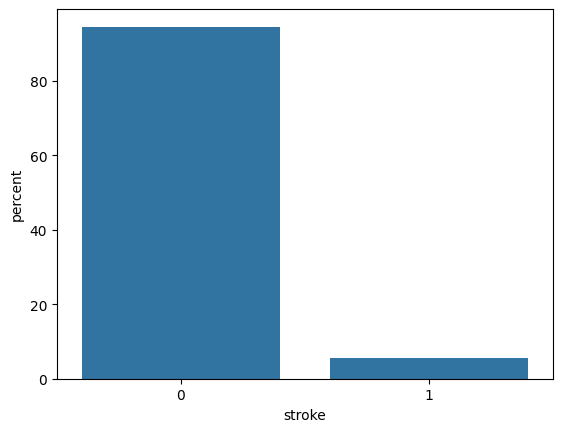

In [716]:
sns.countplot(x='stroke', data=dataset, stat='percent')

It is evident that the dataset is strongly unbalanced towards the non-stroke cathegory. <br>
In fact the percentage of patients who had a stroke in the dataset is $ \lt $ 5.6%.

Since this is non ideal for the training of a model, we will have to balance the dataset before training the model. <br>
The method proposed in the paper is to use the Synthetic Minority Over-sampling Technique (SMOTE) to balance the dataset.

However we first need to preprocess the data, by encoding the categorical variables and normalizing the numerical variables.

## Data preprocessing - Splitting, Encoding, Scaling, Augmenting

### Splitting

In [717]:
from sklearn.model_selection import train_test_split

features = np.array(dataset.columns[:-1])
print(features)

X = dataset[features]
y = dataset['stroke']

['gender' 'age' 'hypertension' 'heart_disease' 'ever_married' 'work_type'
 'Residence_type' 'avg_glucose_level' 'bmi' 'smoking_status']


Since the dataset uses a mix of numerical and categorical variables, we will use a variation of SMOTE called SMOTENC, which is able to handle both types of variables.

### Encoding

In [718]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

X = encoder.fit_transform(X)


After OneHotEncoding the categorical variables are expanded into multiple columns, one for each category. <br>
So now the Gender became the first 2 columns of the dataset, the Ever_married the next 2 columns, and so on.

In [719]:
print(X.shape)
print(X)

(3254, 10)
[[1.000e+00 4.900e+01 0.000e+00 ... 2.680e+03 1.980e+02 0.000e+00]
 [1.000e+00 6.200e+01 0.000e+00 ... 1.770e+03 1.570e+02 1.000e+00]
 [0.000e+00 3.100e+01 0.000e+00 ... 2.329e+03 1.760e+02 2.000e+00]
 ...
 [0.000e+00 6.300e+01 0.000e+00 ... 2.112e+03 2.320e+02 1.000e+00]
 [0.000e+00 1.700e+01 0.000e+00 ... 9.310e+02 1.380e+02 1.000e+00]
 [1.000e+00 3.300e+01 0.000e+00 ... 2.314e+03 8.800e+01 0.000e+00]]


### Scaling and Augmenting

In [720]:
# Balance the dataset using SMOTE
from imblearn.over_sampling import SMOTE

# We should normalize the data before augmenting the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_tmp = scaler.fit_transform(X, y)

# Apply SMOTE
smote = SMOTE(sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(X_tmp, y)

# descaling the data
X_smote = scaler.inverse_transform(X_smote)

print(X_smote)

[[1.00000000e+00 4.90000000e+01 0.00000000e+00 ... 2.68000000e+03
  1.98000000e+02 0.00000000e+00]
 [1.00000000e+00 6.20000000e+01 0.00000000e+00 ... 1.77000000e+03
  1.57000000e+02 1.00000000e+00]
 [0.00000000e+00 3.10000000e+01 0.00000000e+00 ... 2.32900000e+03
  1.76000000e+02 2.00000000e+00]
 ...
 [0.00000000e+00 4.92487340e+01 0.00000000e+00 ... 2.56056759e+03
  2.91947215e+02 4.49746805e-01]
 [1.00000000e+00 4.77465772e+01 0.00000000e+00 ... 2.19046586e+03
  1.10142125e+02 1.60445190e+00]
 [0.00000000e+00 6.21871210e+01 1.00000000e+00 ... 7.96052267e+02
  1.23038887e+02 9.09680112e-01]]


In [721]:
X = X_smote

X = encoder.inverse_transform(X)

In [722]:
print(X)

[['Male' 67.0 0 ... 228.69 36.6 'formerly smoked']
 ['Male' 80.0 0 ... 105.92 32.5 'never smoked']
 ['Female' 49.0 0 ... 171.23 34.4 'smokes']
 ...
 ['Female' 67.0 0 ... 213.03 46.5 'formerly smoked']
 ['Male' 65.0 0 ... 137.3 27.8 'never smoked']
 ['Female' 80.0 1 ... 80.01 29.1 'formerly smoked']]


In [723]:
print(y_smote)

0       1
1       1
2       1
3       1
4       1
       ..
6143    1
6144    1
6145    1
6146    1
6147    1
Name: stroke, Length: 6148, dtype: int64


            stroke
count  6148.000000
mean      0.500000
std       0.500041
min       0.000000
25%       0.000000
50%       0.500000
75%       1.000000
max       1.000000


(6148, 11)


<AxesSubplot:xlabel='stroke', ylabel='count'>

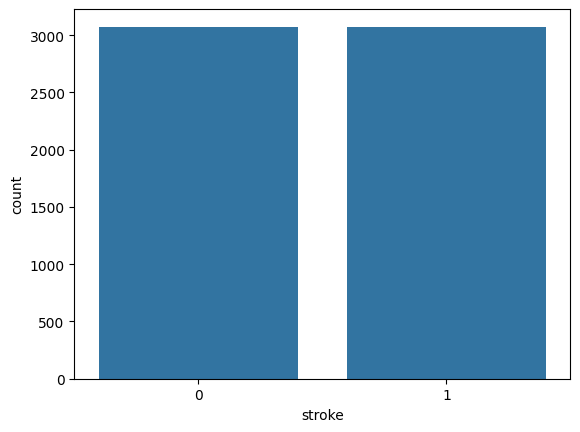

In [724]:
dataset_balanced = pd.DataFrame(X, columns=features)
dataset_balanced['stroke'] = y_smote
print(dataset_balanced.describe())
print(dataset_balanced.shape)

sns.countplot(x='stroke', data=dataset_balanced)

As we can see, the dataset is now balanced, and we can proceed with the training of the model.

## Data visualization

In [725]:
#we want to group by age in age groups
dataset_balanced['age_group'] = pd.cut(dataset_balanced['age'], bins=[17, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 100], labels=['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75+'])

Now we can visualize the data to get a better understanding of the dataset. <br>
In particular, the trend of stroke is clearly correlated to age and more visible in the data.

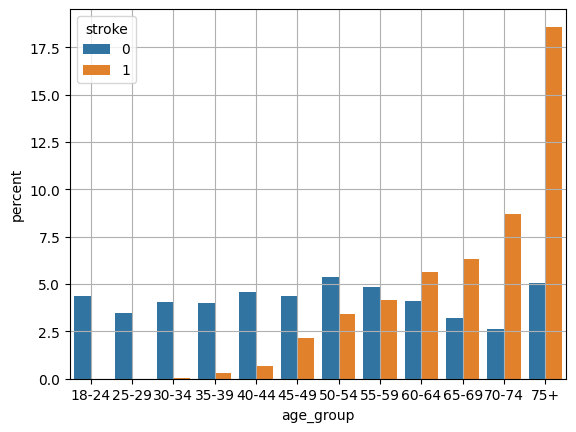

In [726]:
sns.countplot(x='age_group', hue='stroke', data=dataset_balanced, stat='percent')
plt.grid()

Another way to visualize the same data is to color the percentage of stroke in the dataset per age-group. <br>

<AxesSubplot:xlabel='gender', ylabel='percent'>

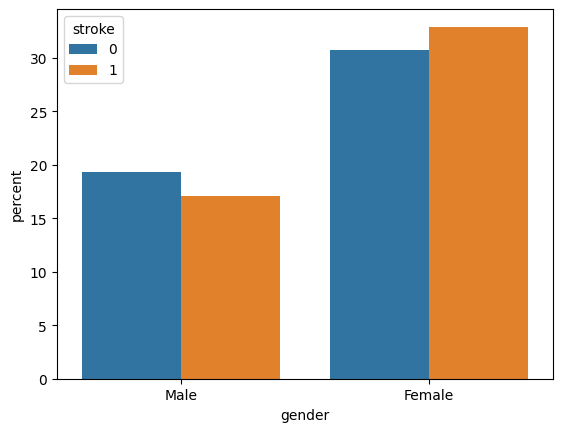

In [738]:
sns.countplot(x='gender',hue='stroke', data=dataset_balanced, stat='percent')
#sns.countplot(x='stroke', hue='gender', data=dataset_balanced, stat='percent')

In [739]:
# counting stroke
stroke_count =dataset['stroke'].value_counts()
# print(stroke_count)
print("Stroke fraction ", stroke_count[1]/(stroke_count[0]+stroke_count[1]))

# counting gender
gender_count = dataset['gender'].value_counts()
males_who_had_stroke = dataset[(dataset['gender'] == 'Male') & (dataset['stroke'] == 1)]
females_who_had_stroke = dataset[(dataset['gender'] == 'Female') & (dataset['stroke'] == 1)]
print('Males: ', gender_count['Male'])
print('Females: ', gender_count['Female'])

Stroke fraction  0.05531653349723417
Males:  1260
Females:  1994


In [728]:
stroke_count =dataset_balanced['stroke'].value_counts()
males_who_had_stroke = dataset_balanced[(dataset_balanced['gender'] == 'Male') & (dataset_balanced['stroke'] == 1)]
females_who_had_stroke = dataset_balanced[(dataset_balanced['gender'] == 'Female') & (dataset_balanced['stroke'] == 1)]
print("Percent of males who had a stroke: ", males_who_had_stroke.shape[0]/stroke_count[1])
print("Number of females who had a stroke: ", females_who_had_stroke.shape[0]/stroke_count[1])

Percent of males who had a stroke:  0.34222511385816523
Number of females who had a stroke:  0.6577748861418348


<AxesSubplot:xlabel='hypertension', ylabel='percent'>

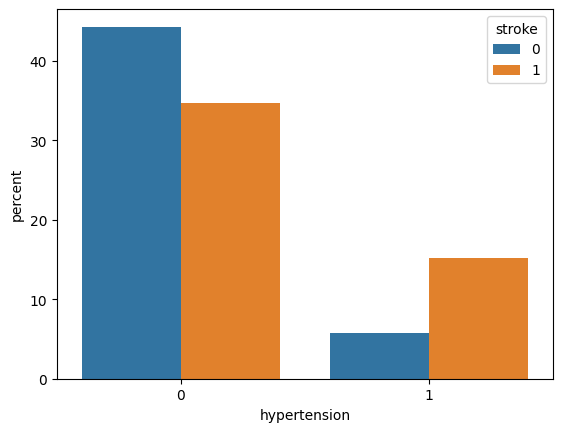

In [729]:
sns.countplot(x='hypertension', hue='stroke', data=dataset_balanced, stat='percent')

<AxesSubplot:xlabel='heart_disease', ylabel='percent'>

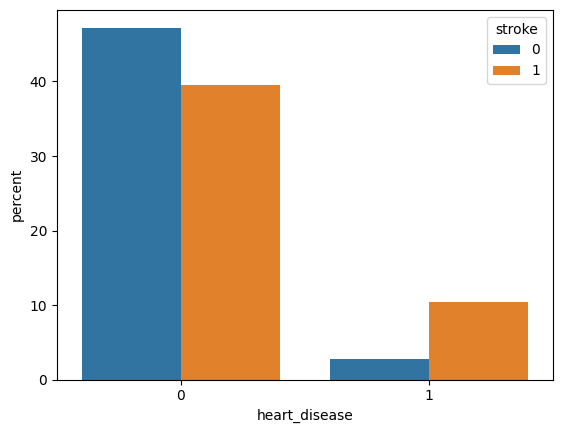

In [730]:
sns.countplot(x='heart_disease', hue='stroke', data=dataset_balanced, stat='percent')

<AxesSubplot:xlabel='ever_married', ylabel='percent'>

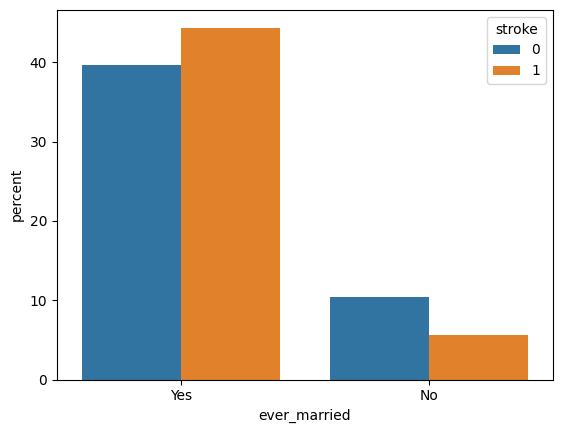

In [731]:
sns.countplot(x='ever_married', hue='stroke', data=dataset_balanced, stat='percent')

<AxesSubplot:xlabel='work_type', ylabel='percent'>

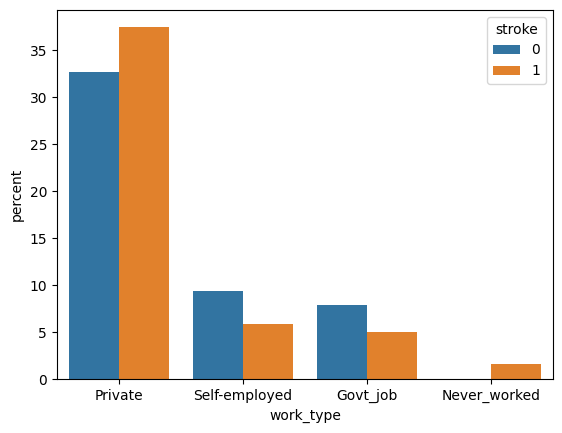

In [732]:
sns.countplot(x='work_type', hue='stroke', data=dataset_balanced, stat='percent')

<AxesSubplot:xlabel='Residence_type', ylabel='percent'>

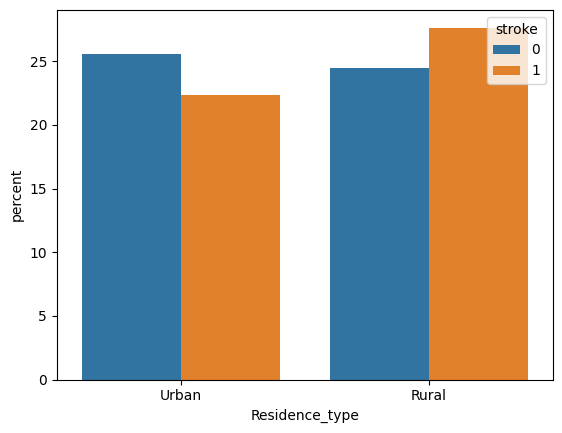

In [733]:
sns.countplot(x='Residence_type', hue='stroke', data=dataset_balanced, stat='percent')

<AxesSubplot:xlabel='smoking_status', ylabel='percent'>

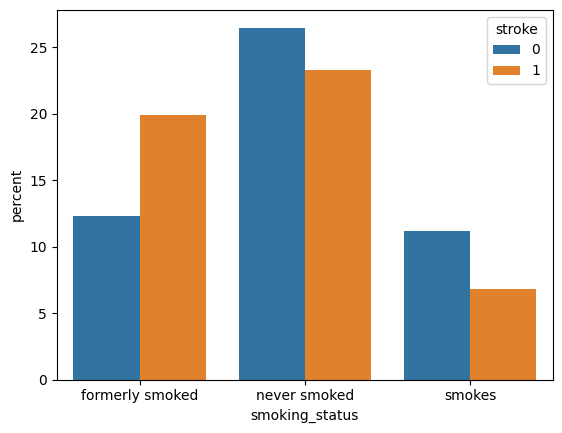

In [734]:
sns.countplot(x='smoking_status', hue='stroke', data=dataset_balanced, stat='percent')

In [735]:
dataset_balanced['BMI CATEGORY'] = pd.cut(dataset_balanced['bmi'], bins=[0, 18.5, 25.0, 30.0, 35.0, 40.0, 100], labels=['Underweight', 'Healthy', 'Overweight', 'Obese I', 'Obese II', 'Obese III'])

<AxesSubplot:xlabel='BMI CATEGORY', ylabel='percent'>

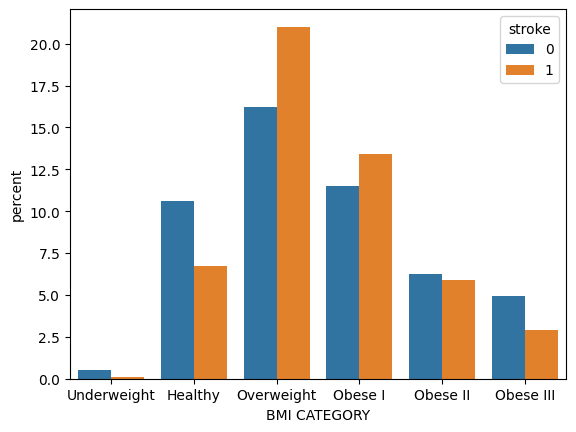

In [736]:
sns.countplot(x='BMI CATEGORY', hue='stroke', data=dataset_balanced, stat='percent')

## Dividing the dataset in training and testing set

We will divide the dataset in training and testing set, using a 80-20 split, and train the model on the training set.

In [737]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ValueError: Found input variables with inconsistent numbers of samples: [6148, 3254]

In [ ]:
print(X_train)
print(y_train)

print(X_train.shape)
print(y_train.shape)

      gender   age  hypertension  heart_disease ever_married      work_type  \
3406    Male  24.0             0              0           No        Private   
1181  Female  32.0             0              0           No        Private   
796   Female  29.0             0              0           No        Private   
2221    Male  55.0             0              1           No        Private   
1937  Female  41.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
2001  Female  25.0             0              0          Yes        Private   
4937  Female  62.0             1              0          Yes  Self-employed   
1394  Female  21.0             0              0           No        Private   
2564  Female  35.0             0              0           No        Private   
156   Female  50.0             0              0          Yes        Private   

     Residence_type  avg_glucose_level   bmi   smok

## Feature selection and ranking

In the paper, the authors used used a Random Forest Classifier and an information gain method to rank the features. <br>

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# use a Random Forest Classifier to determine the importance of each feature by assigning a rank to each feature
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)


ValueError: could not convert string to float: 'Male'